# ADP

## 연관분석
***

### Q1) 연관규칙분석을 수행하기 위해 lotto 데이터셋을 transaction 데이터로 변환하시오. <br>단, 본 분석에서 로또번호가 추첨된 순서는 고려하지 않고 분석을 수행하도록 한다. <br>그리고 변환된 데이터에서 가장 많이 등장한 상위 10개의 로또번호를 막대그래프로 출력하고 <br>이에 대해 설명하시오.  

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [15]:
df = pd.read_csv('C:/Users/kcisa/Desktop/ADP실기/모의고사 1회/lotto.csv')

In [16]:
df.head()

,time_id,num1,num2,num3,num4,num5,num6
0,859,8,22,35,38,39,41
1,858,9,13,32,38,39,43
2,857,6,10,16,28,34,38
3,856,10,24,40,41,43,44
4,855,8,15,17,19,43,44


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   time_id  859 non-null    int64
 1   num1     859 non-null    int64
 2   num2     859 non-null    int64
 3   num3     859 non-null    int64
 4   num4     859 non-null    int64
 5   num5     859 non-null    int64
 6   num6     859 non-null    int64
dtypes: int64(7)
memory usage: 47.1 KB


In [5]:
num_list = pd.concat([df.num1, df.num2, df.num3, df.num4, df.num5, df.num6], axis = 0, ignore_index = True)

In [6]:
num_cnt_df = pd.DataFrame(Counter(num_list).items(), columns = ['number', 'count'])
top10_df = num_cnt_df.sort_values(by = 'count', ascending = 0)[:10]

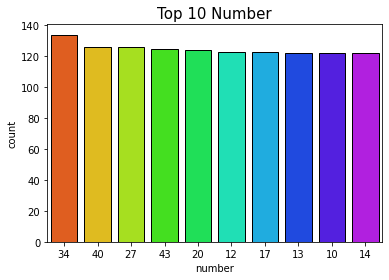

In [7]:
sns.barplot(top10_df.number, top10_df['count'], order = top10_df.number, palette = 'gist_rainbow', edgecolor = (0,0,0))
plt.title('Top 10 Number', size = 15)
plt.show()

### 34번이 가장 많이 등장함.

***
### Q2) 변환한 데이터에 대해 apriori함수를 사용하여 다음 괄호 안의 조건을 반영하여 <br>연관규칙을 생성하고, 이를 ‘rules_1’이라는 변수에 저장하여 결과를 해석하시오. <br>(최소 지지도 : 0.002, 최소 신뢰도 : 0.8, 최소조합 항목 수 : 2개, 최대조합 항목 수 : 6개) <br>그리고 도출된 연관규칙들을 향상도를 기준으로 내림차순 정렬하여 상위 30개의 규칙을 확인하고, <br>이를 데이터프레임으로 변환하여 csv파일로 출력하시오.  

In [9]:
df['value_list'] = value_list
df = df[['time_id', 'value_list']]

In [24]:
t = TransactionEncoder()
t_a = t.fit_transform(df.iloc[:, 1:].values)
rule = pd.DataFrame(t_a, columns = t.columns_)
rule.head()

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,False,False,False,False,False,False,False,True,False,False,...,False,False,True,True,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,True,False,False
2,False,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,True,False,True,True,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False


In [51]:
frequent = apriori(rule, min_support=0.002, use_colnames=True)
frequent.head()

,support,itemsets
0,0.142026,(1)
1,0.130384,(2)
2,0.129220,(3)
3,0.133877,(4)
4,0.138533,(5)


In [52]:
rule_1 = association_rules(frequent, metric='confidence', min_threshold=0.8)

In [53]:
rule_1['cnt_rule'] = rule_1.antecedents.apply(lambda x : len(x)) + rule_1.consequents.apply(lambda x : len(x))

In [54]:
rule_1 = rule_1.loc[rule_1.cnt_rule > 1]

In [58]:
print(f'규칙 개수는 {rule_1.shape[0]}개이다.')

규칙 개수는 704개이다.


In [83]:
rule_2 = rule_1.sort_values(by = 'lift', ascending = False)[:30]
rule_2.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,cnt_rule
703,"(16, 26, 31)","(43, 36)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,5
643,"(24, 34, 22)","(31, 7)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,5
642,"(34, 31, 7)","(24, 22)",0.002328,0.012806,0.002328,1.0,78.090909,0.002298,inf,5
682,"(26, 21, 14)","(18, 15)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5
652,"(34, 10, 36)","(44, 22)",0.002328,0.013970,0.002328,1.0,71.583333,0.002296,inf,5


In [84]:
#rule_2.to_csv()

***
### Q3) 생성된 연관규칙 'rules_1'에 대한 정보를 해석하고, 1)번 문제를 통해 확인했을 때 
###     가장 많이 추첨된 번호가 우측항에 존재하는 규칙들만을 ‘rules_most_freq’라는 변수에 저장하시오. 
###     그리고 해당 규칙들을 해석하여 인사이트를 도출한 후 서술하시오.

In [86]:
rule_1.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction,cnt_rule
count,704.000000,704.000000,704.000000,704.0,704.000000,704.000000,704.0,704.000000
mean,0.002363,0.131062,0.002363,1.0,9.297555,0.002053,inf,4.102273
std,0.000198,0.023771,0.000198,0.0,9.994010,0.000177,NaN,0.303222
min,0.002328,0.012806,0.002328,1.0,6.410448,0.001965,inf,4.000000
25%,0.002328,0.129220,0.002328,1.0,7.040984,0.001998,inf,4.000000
50%,0.002328,0.136205,0.002328,1.0,7.341880,0.002014,inf,4.000000
75%,0.002328,0.142026,0.002328,1.0,7.738739,0.002028,inf,4.000000
max,0.003492,0.155995,0.003492,1.0,78.090909,0.003098,inf,5.000000


In [101]:
rule_1.cnt_rule.value_counts()

4    632
5     72
Name: cnt_rule, dtype: int64

4개의 숫자로 이루어진 규칙은 632개 5개로 이루어진 규칙은 72개이다. 향상도의 최소값은 6.410이며 평균 지지도는 0.002328로 나타났다.

In [90]:
rule_1['in_34'] = [1 if 34 in x else 0 for x in rule_1.consequents]

In [102]:
rule_most_freq = rule_1.loc[(rule_1.in_34 == 1) & (rule_1.consequents.apply(lambda x : len(x)) ==1)]
rule_most_freq

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,cnt_rule,in_34
8,"(1, 5, 13)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,1
50,"(2, 4, 31)",(34),0.003492,0.155995,0.003492,1.0,6.410448,0.002948,inf,4,1
68,"(2, 21, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,1
72,"(2, 28, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,1
192,"(5, 29, 13)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,1
203,"(17, 5, 29)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,1
281,"(7, 22, 31)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,1
282,"(24, 31, 7)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,1
419,"(12, 37, 36)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,1
471,"(25, 44, 14)",(34),0.002328,0.155995,0.002328,1.0,6.410448,0.001965,inf,4,1


총 19개의 규칙이 도출되었고 1번 규칙을 보면 {1,5,13}번과 {34}번이 함께 등장할 확률은 지지도(support)를 본 결과 0.002328로 약 0.2%에 불과하다. 이 규칙의 향상도(lift)는 6.410448로 {34}만 뽑힐 확률 보다 {1, 5, 13}이 뽑히고 {34}도 뽑힐 확률이 약 6배 높다는 것을 의미한다. 하지만 이런 규칙은 단순 조합에 대한 것으로 추첨번호 가능성을 보장해주지는 않는다.